In [2]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import rv_discrete, rv_continuous, norm
from scipy.integrate import quad
from scipy.interpolate import interp1d

## Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [3]:
# Load functions .py files
from Theoretical_boundaries_visualization_functions import optimal_stopping_Brownian_bridge, optimal_stopping_Normal
from Checking_simulated_boundary_functions import simulate_process, value_function_first_step, v_expectance_1
from Checking_simulated_boundary_functions_2 import simulate_brownian_bridge, mu_ty_simulator, compute_v_expec, parallel_loop, v_expectance, optimal_stopping_montecarlo

# Testing

## Value function evolution

Temporal grid point: 900
Temporal grid point: 800
Temporal grid point: 700
Temporal grid point: 600
Temporal grid point: 500
Temporal grid point: 400
Temporal grid point: 300
Temporal grid point: 200
Temporal grid point: 100


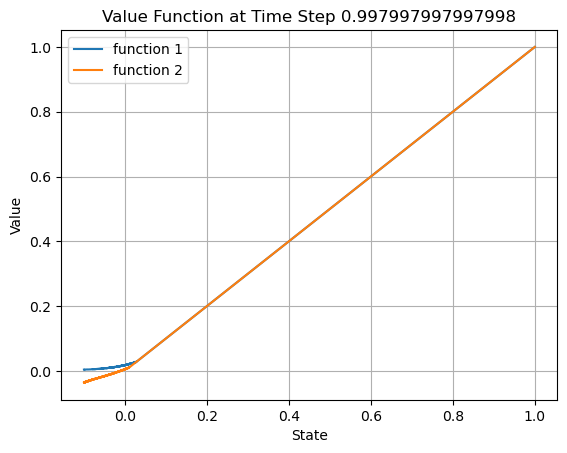

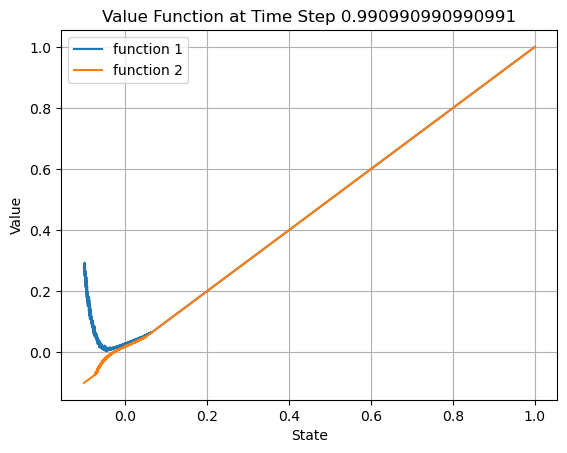

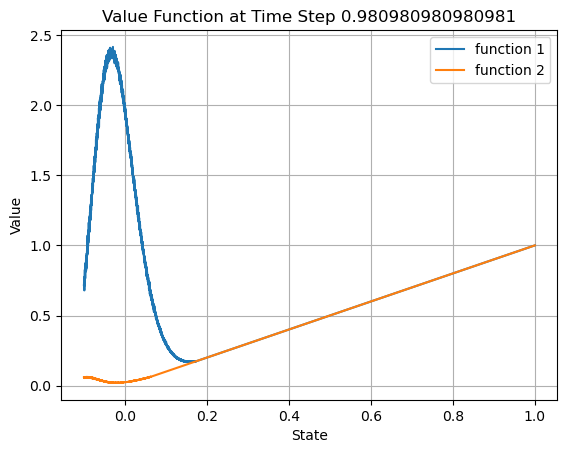

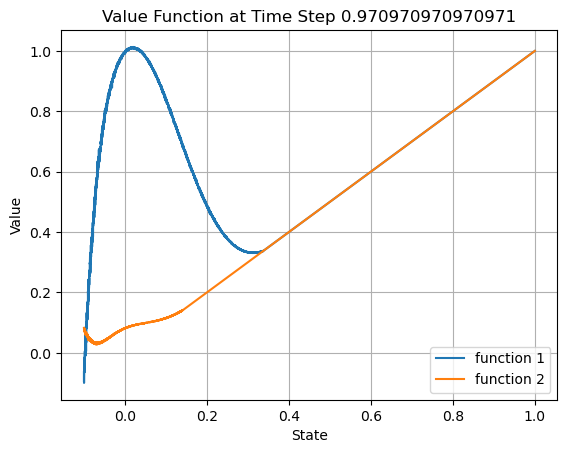

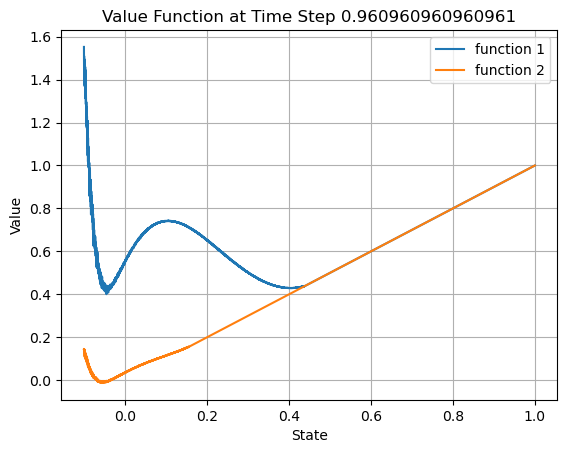

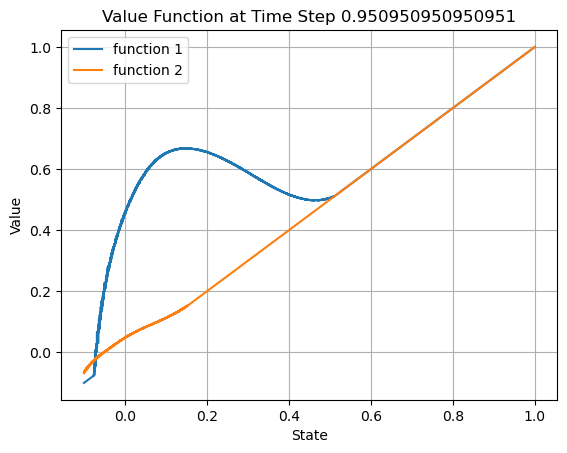

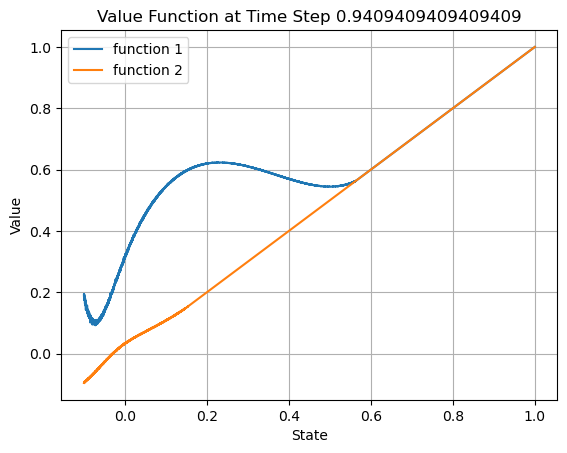

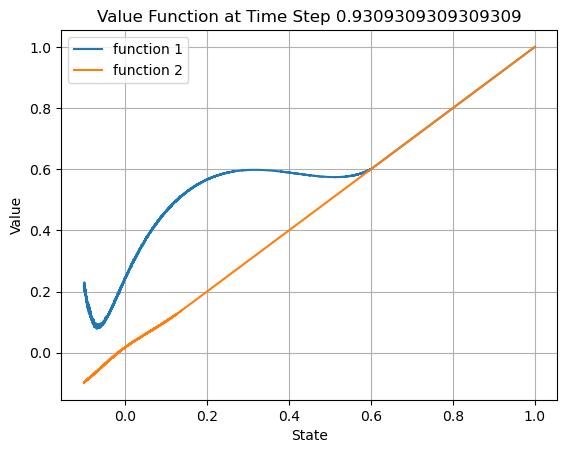

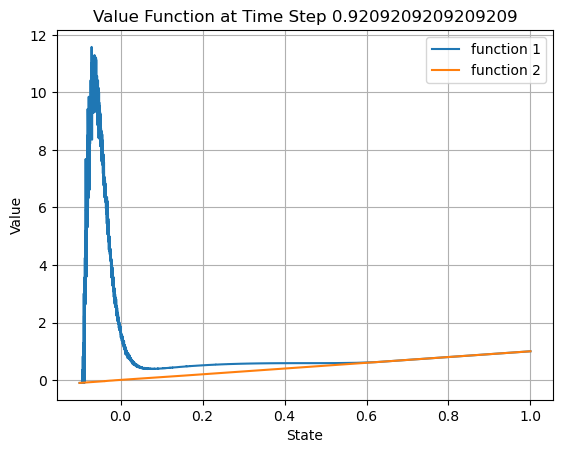

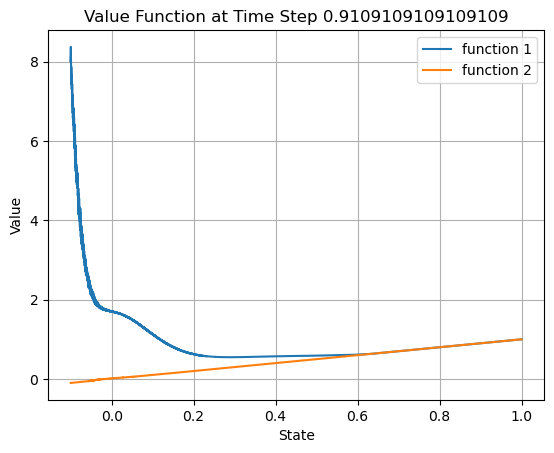

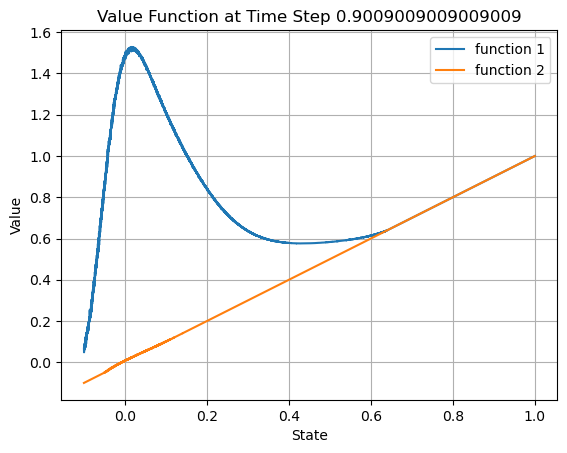

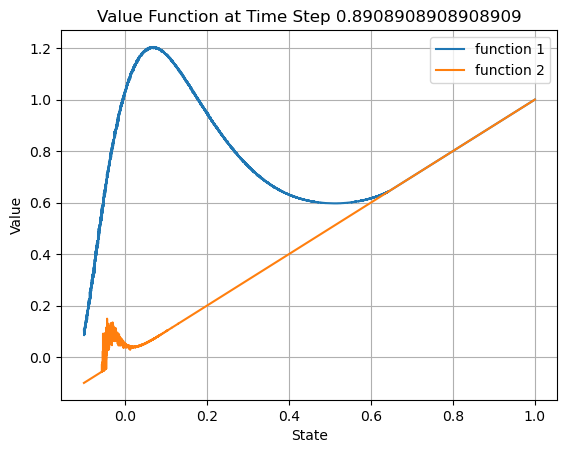

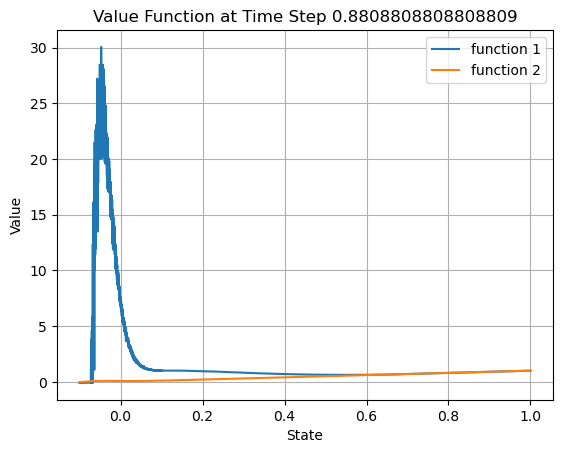

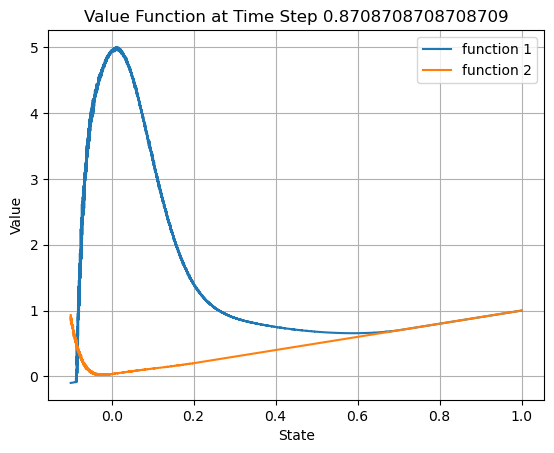

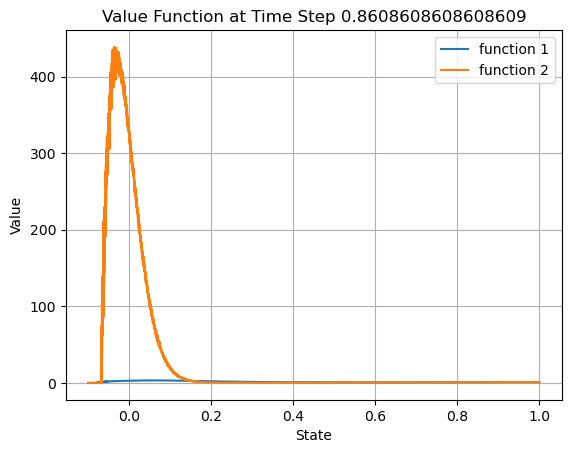

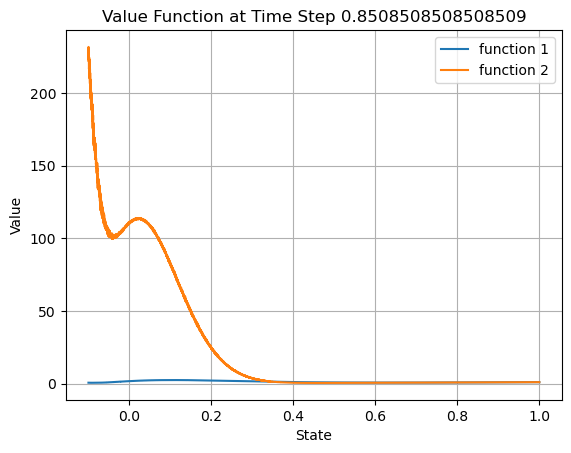

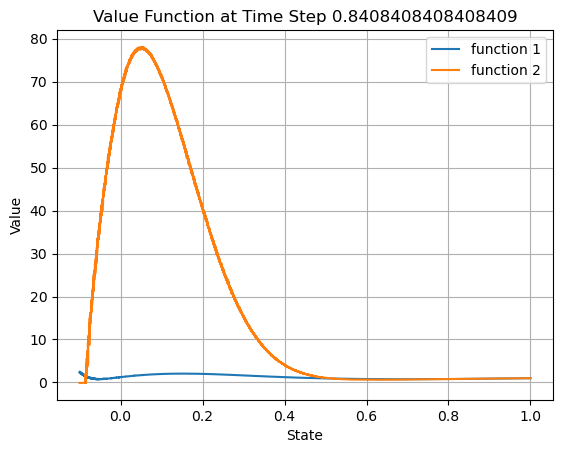

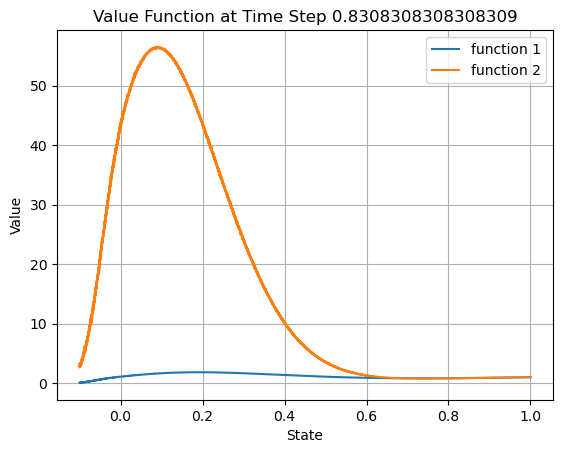

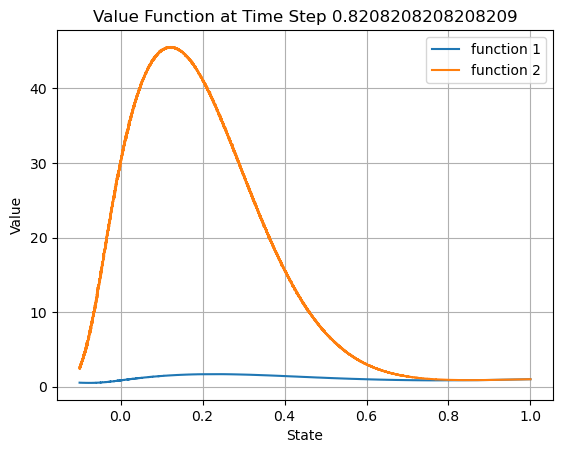

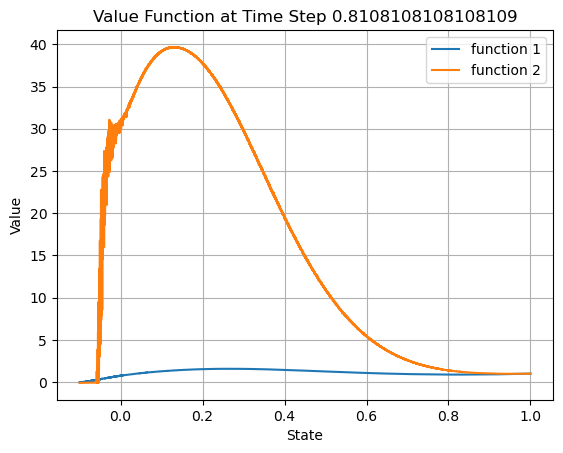

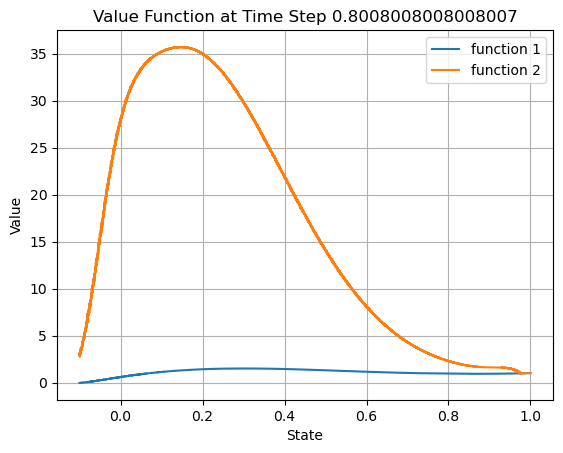

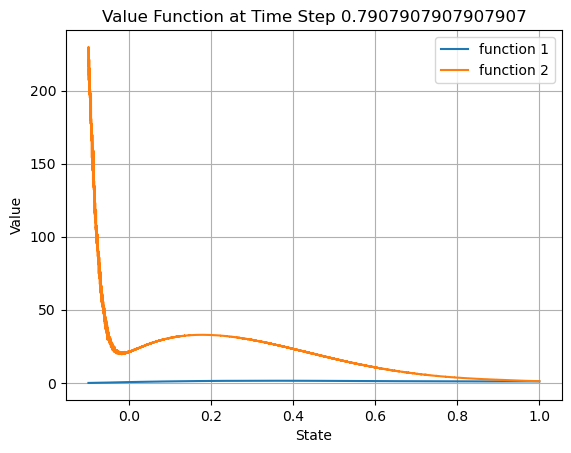

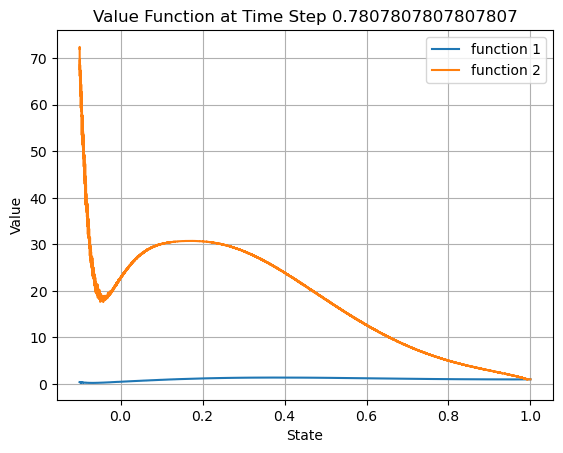

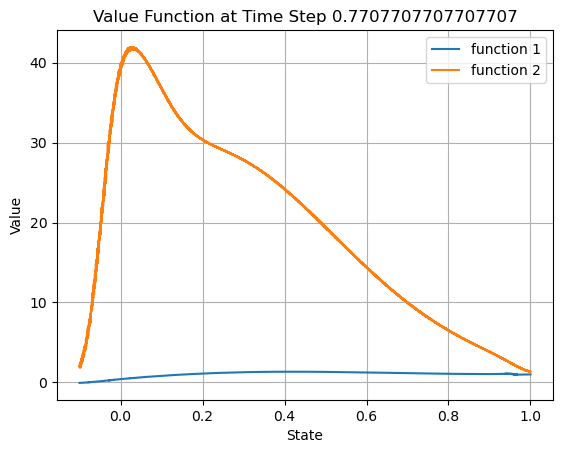

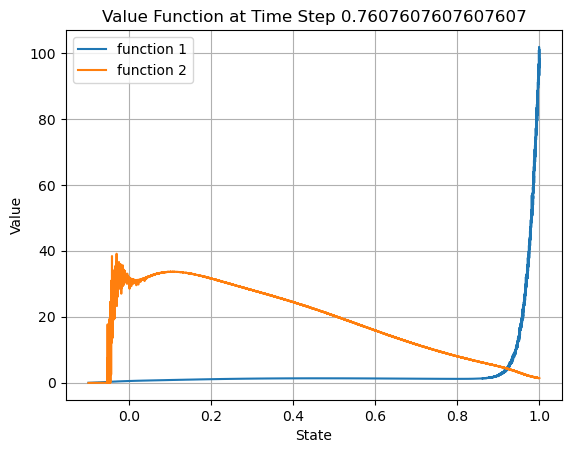

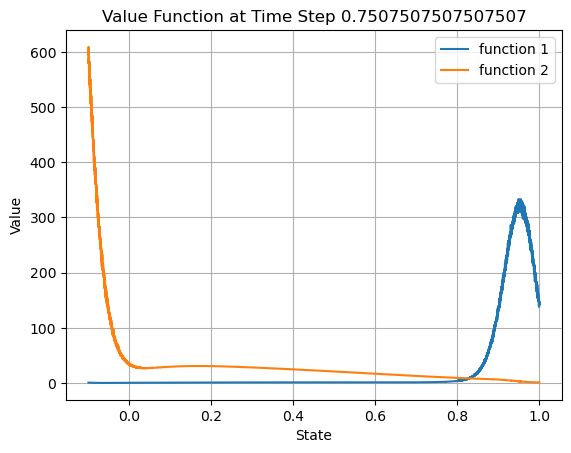

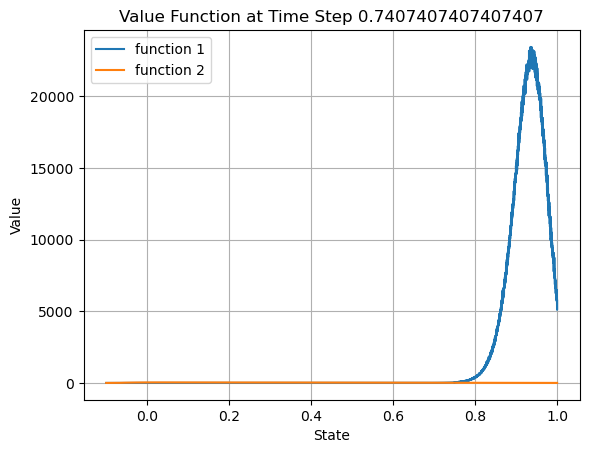

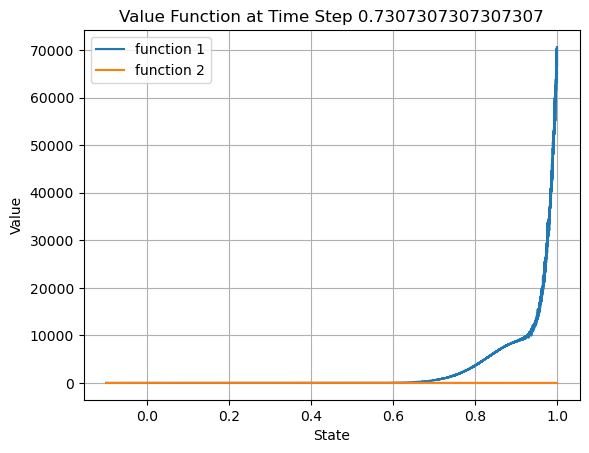

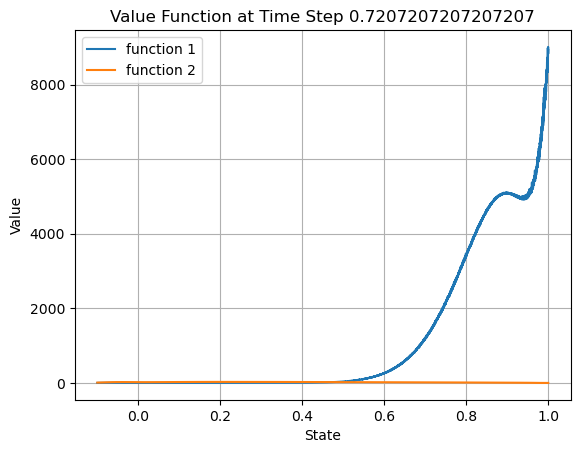

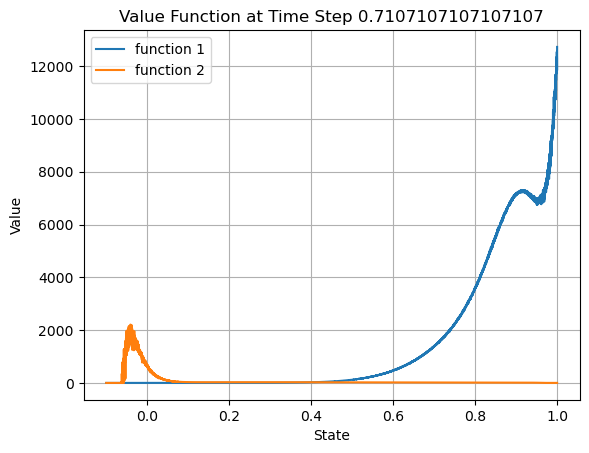

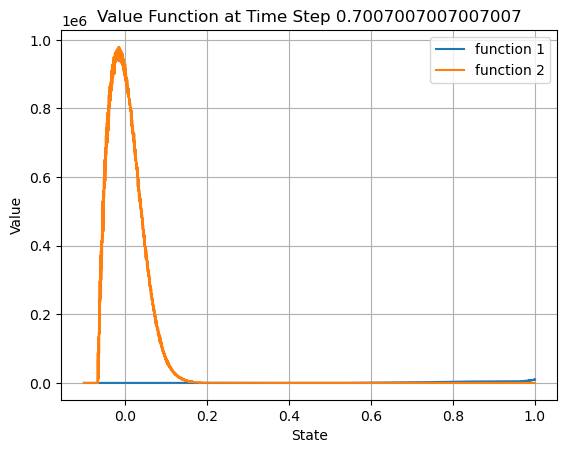

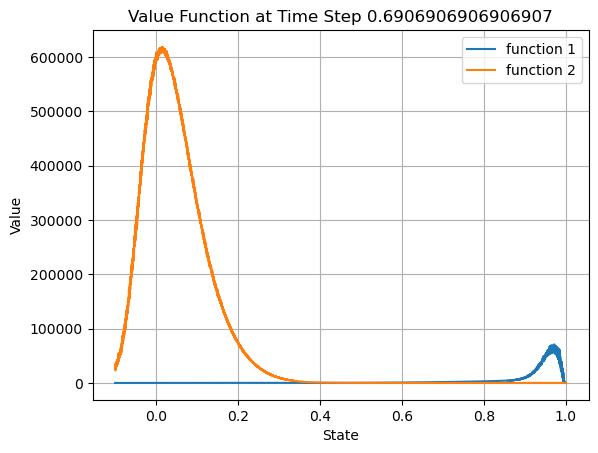

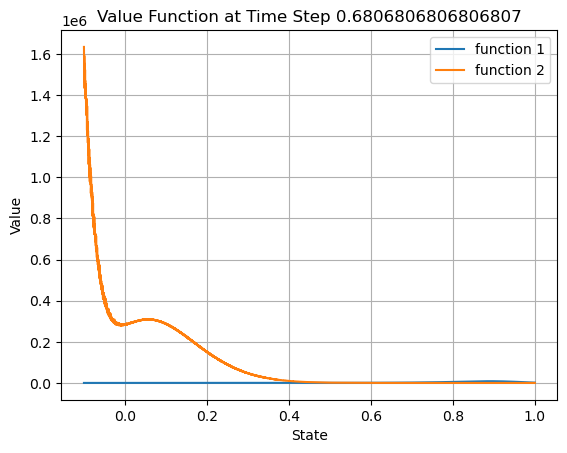

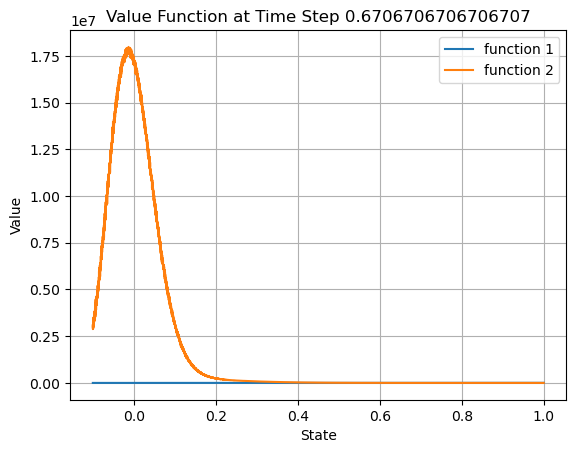

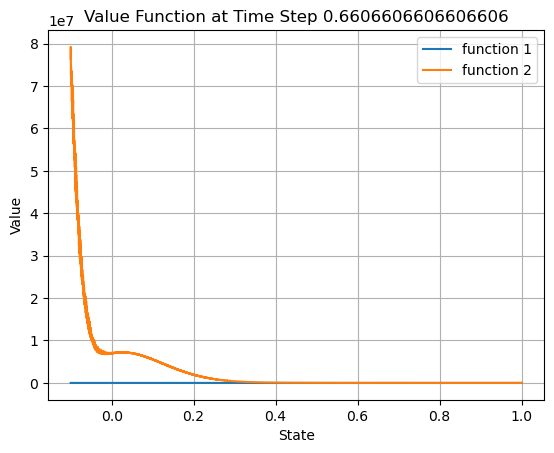

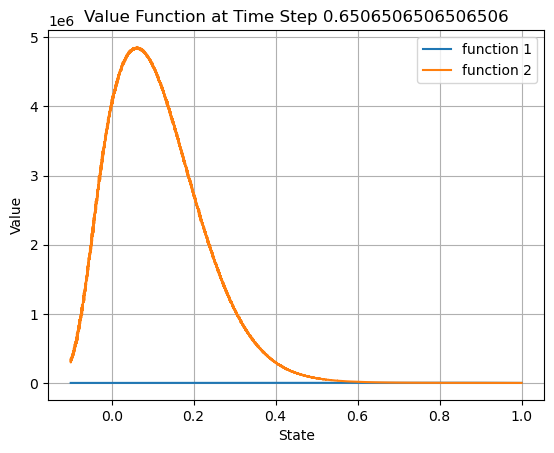

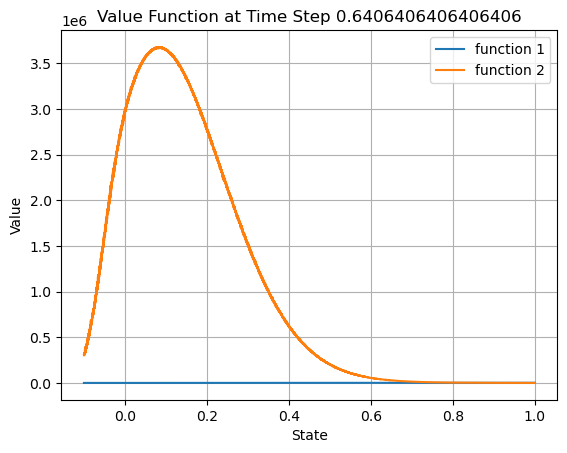

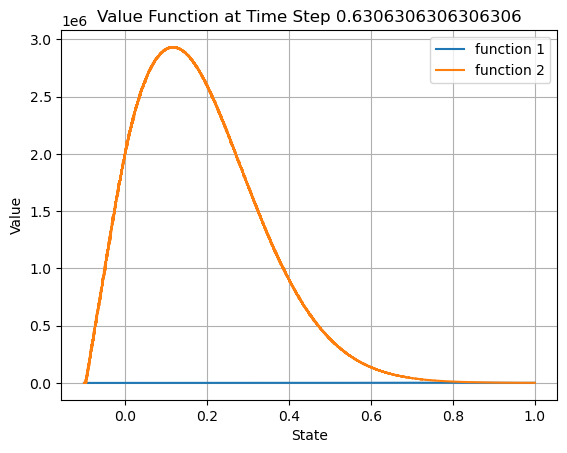

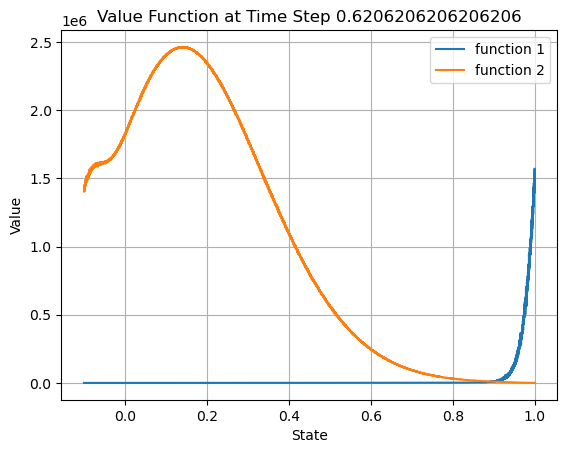

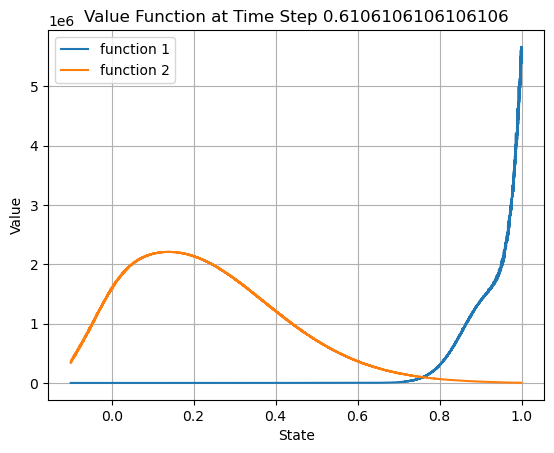

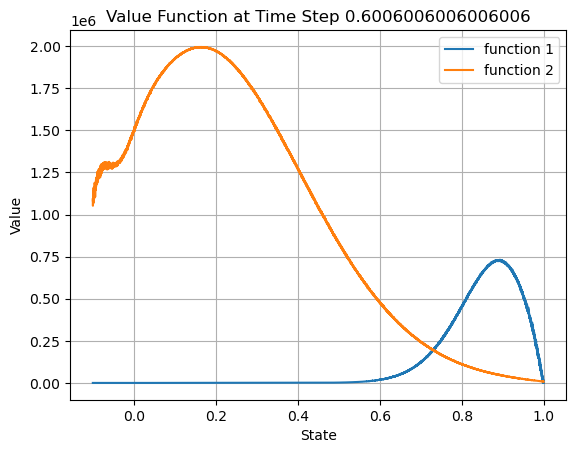

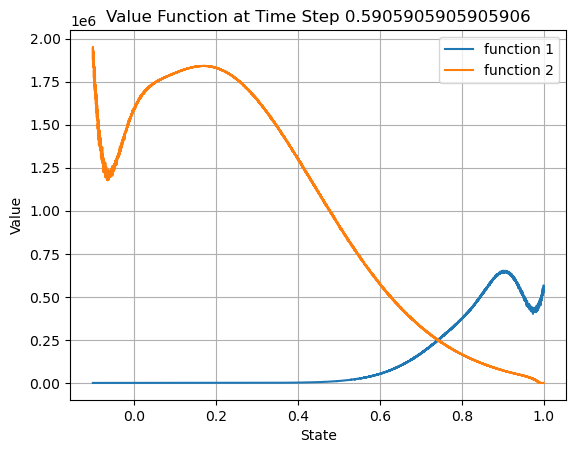

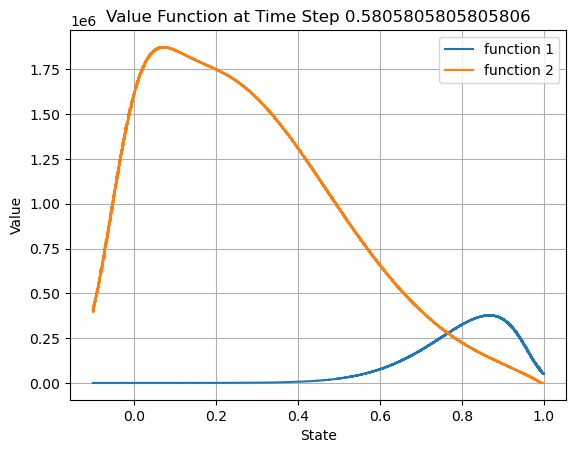

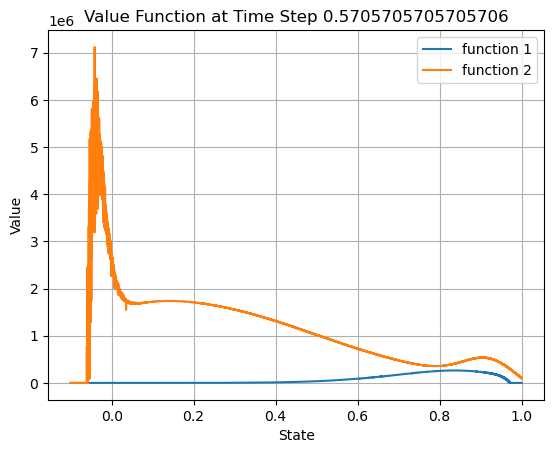

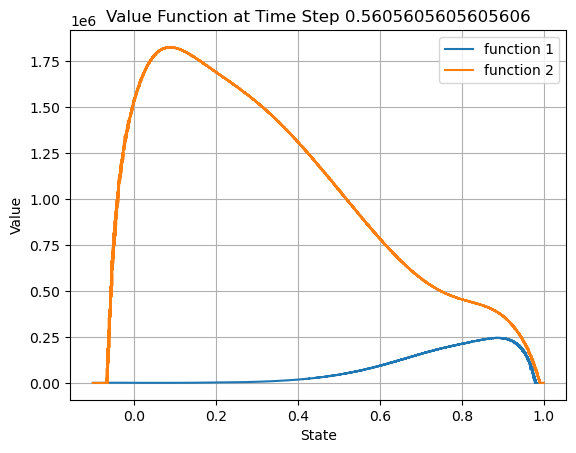

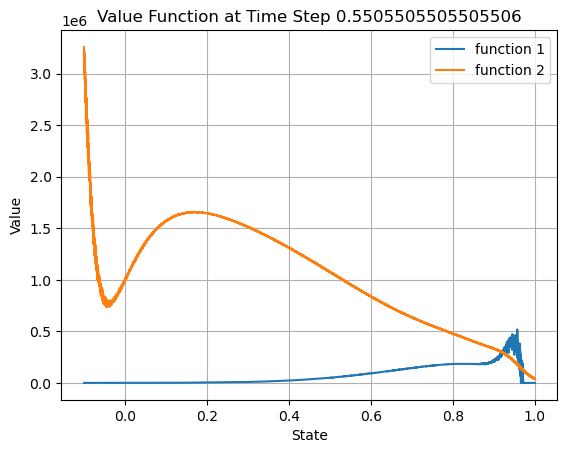

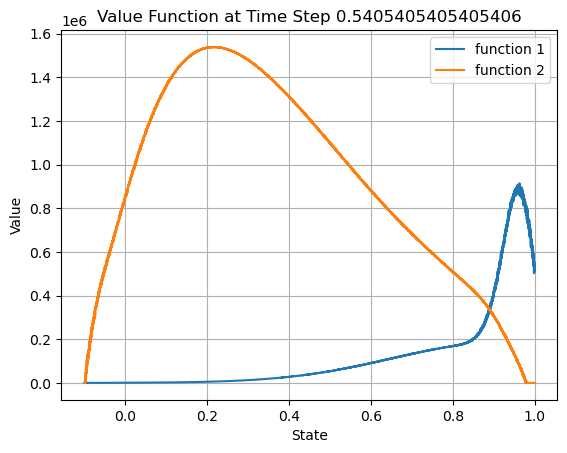

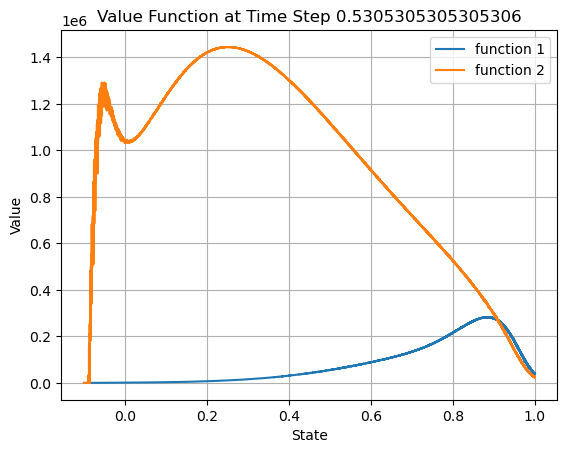

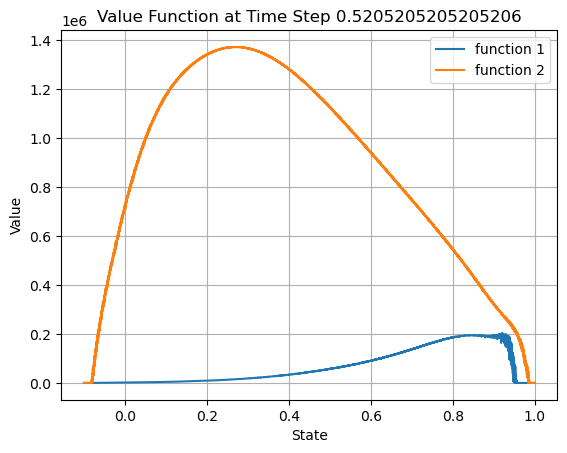

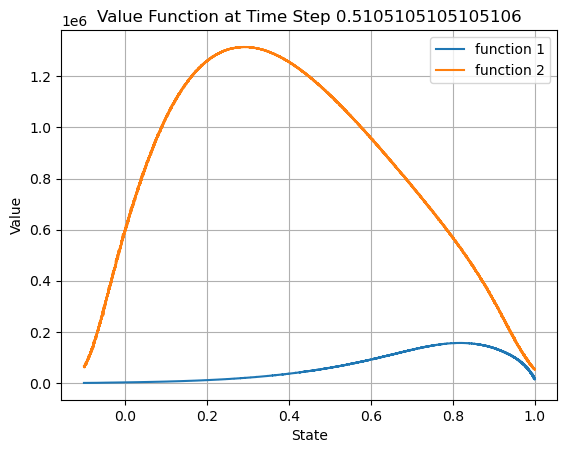

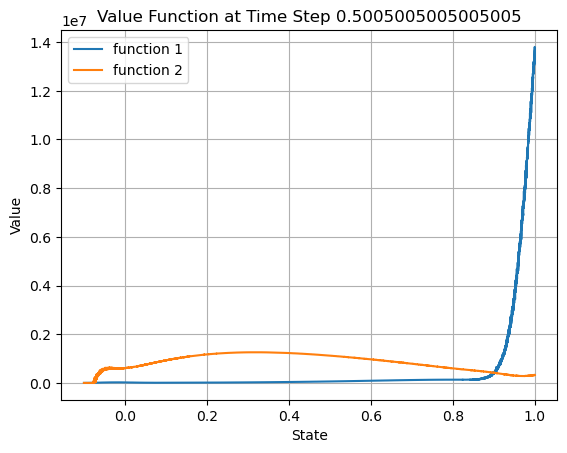

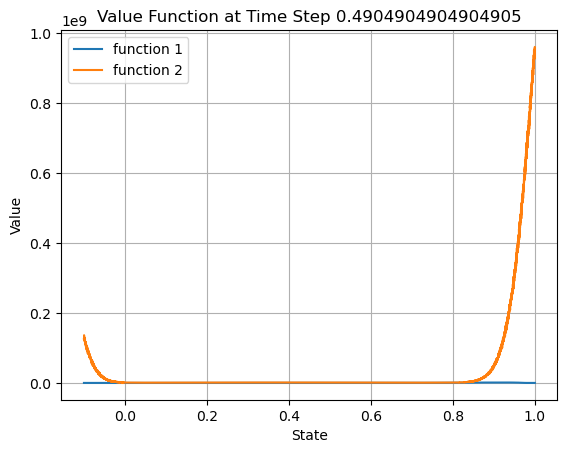

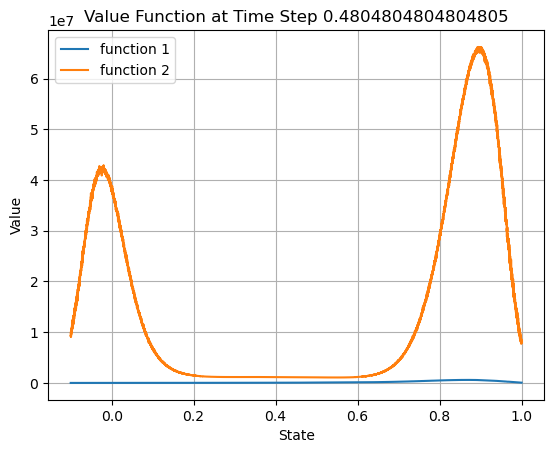

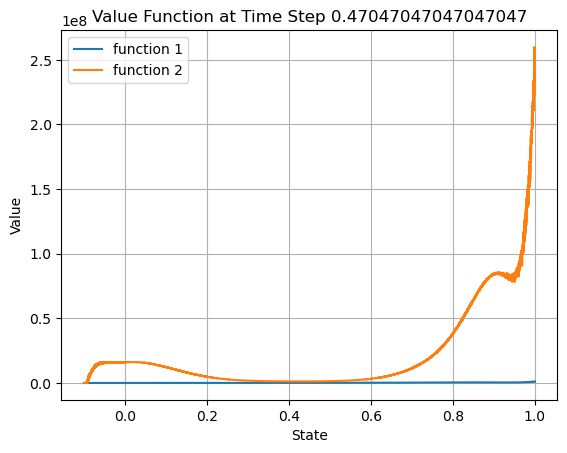

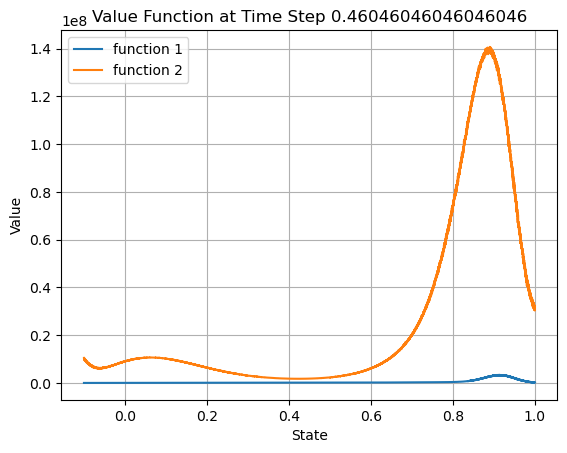

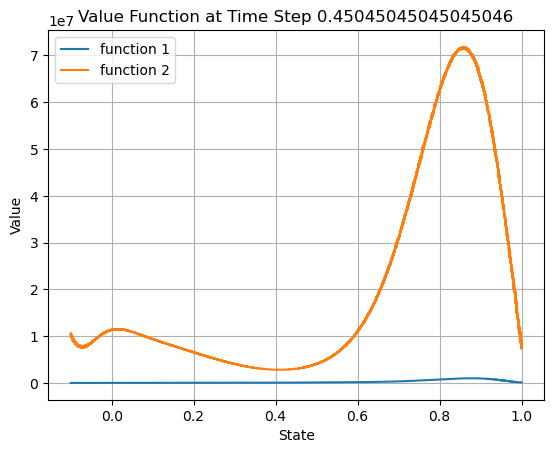

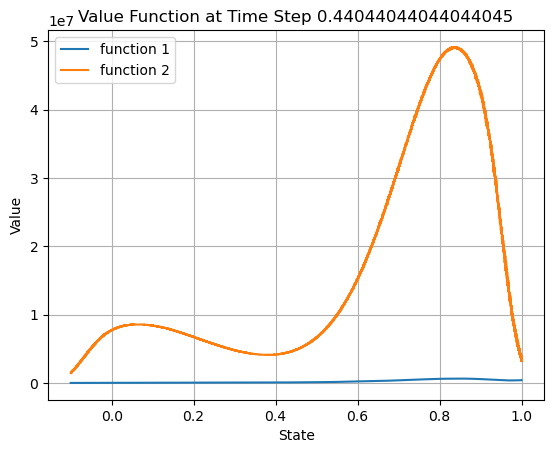

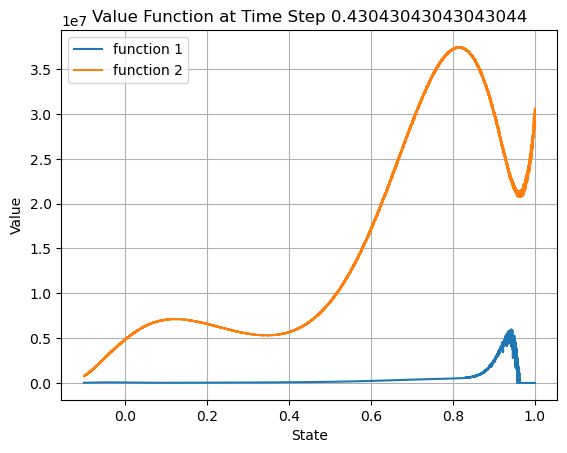

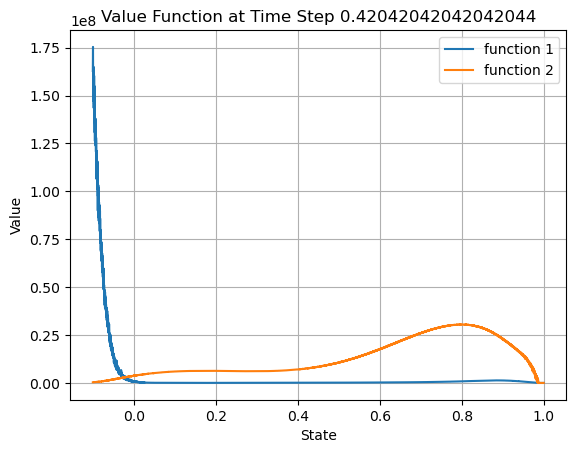

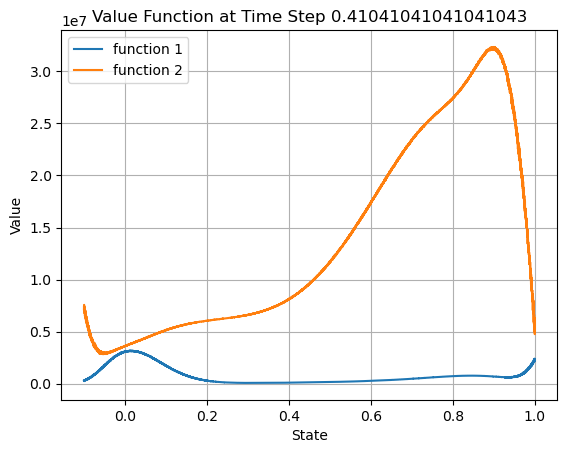

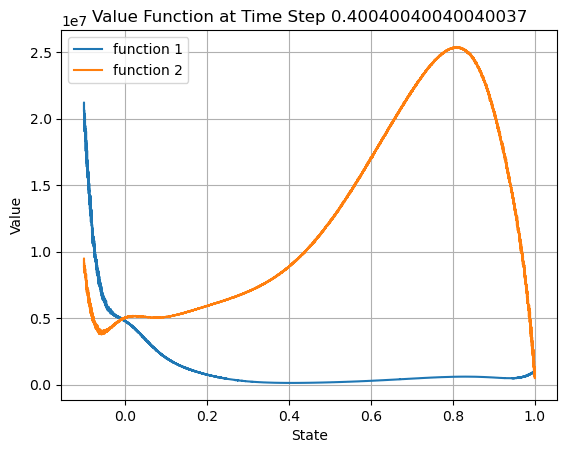

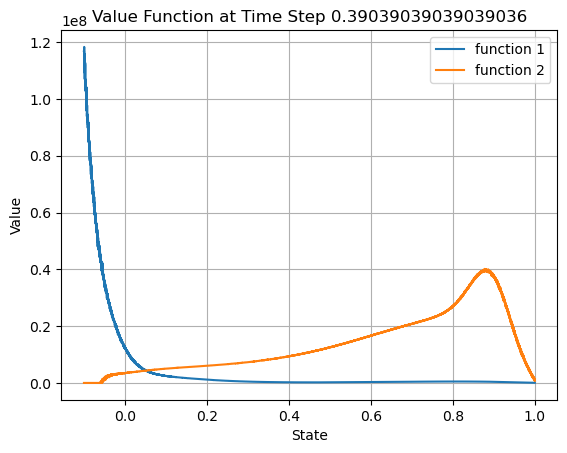

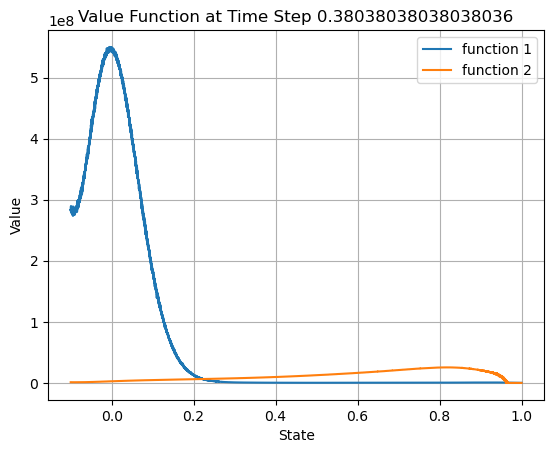

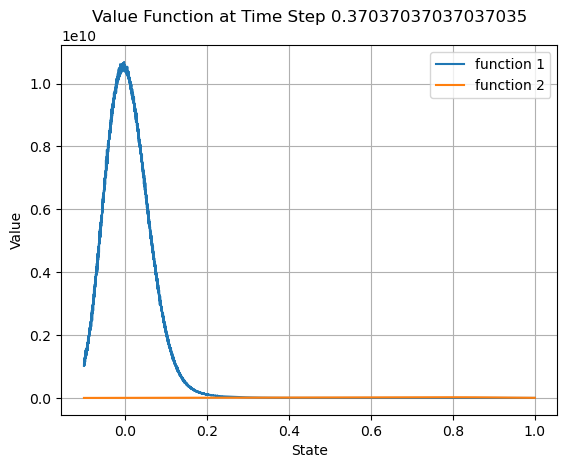

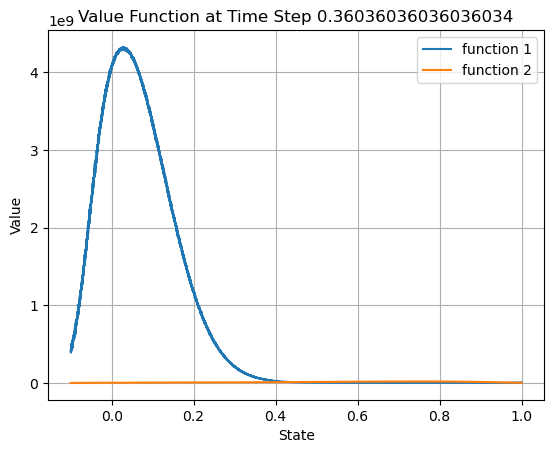

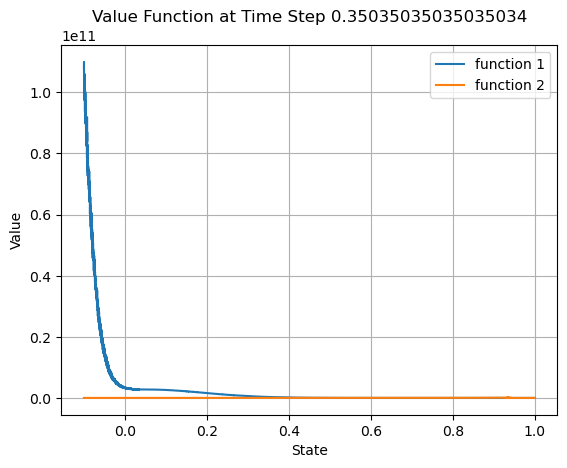

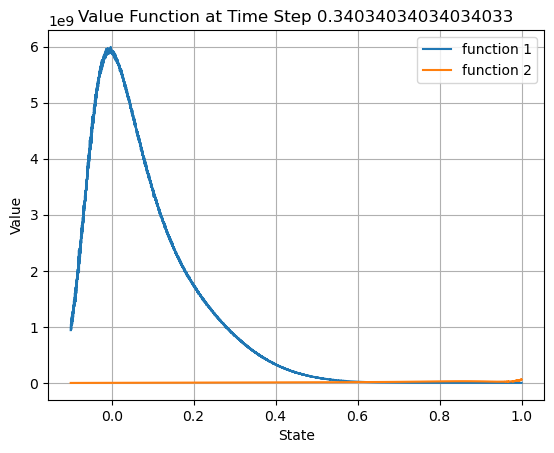

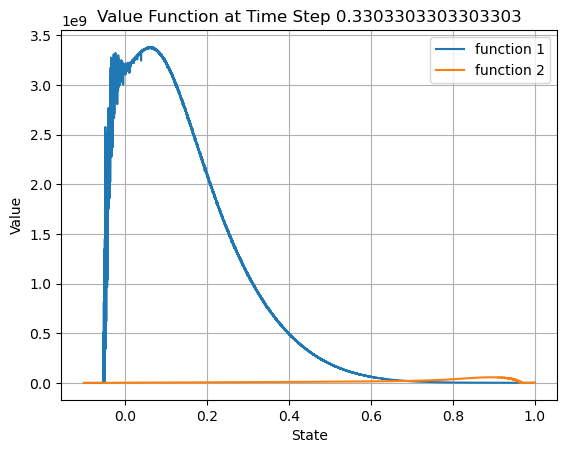

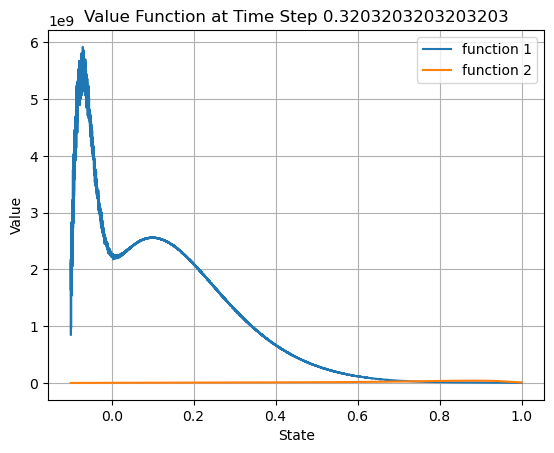

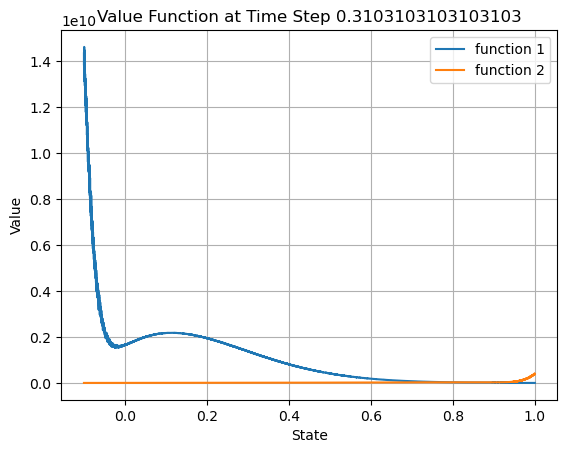

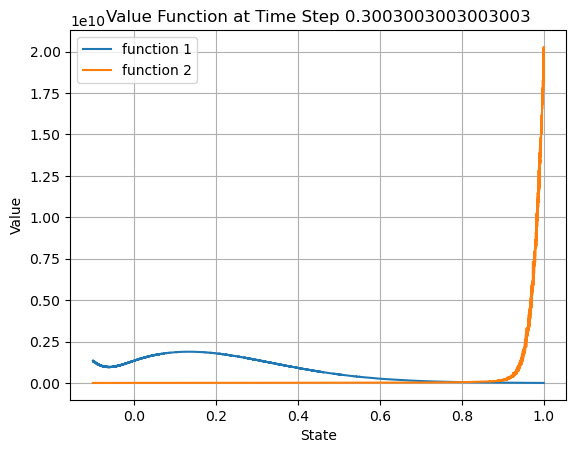

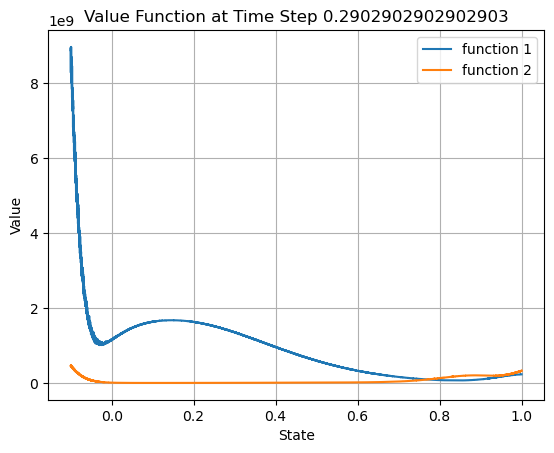

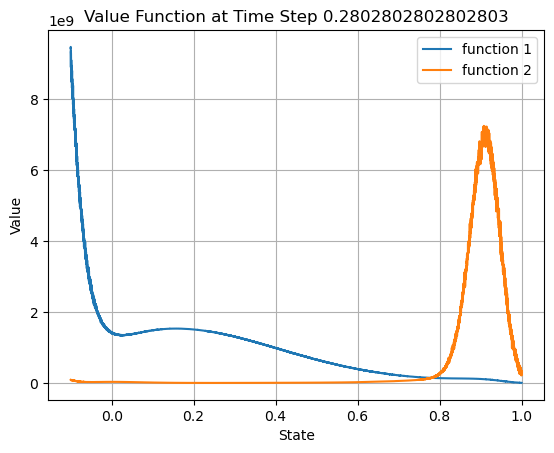

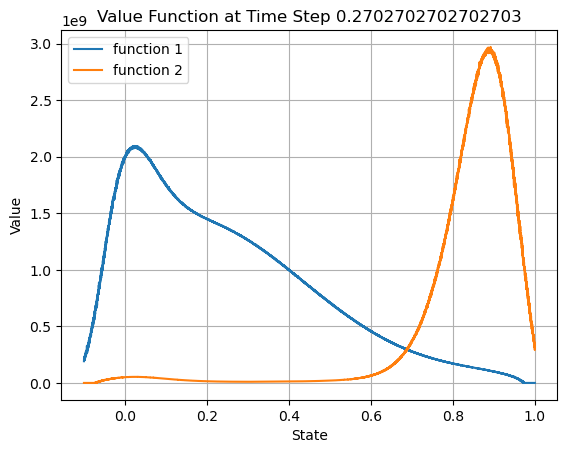

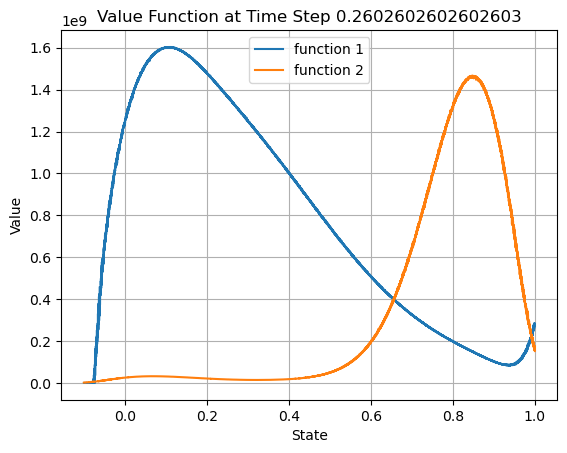

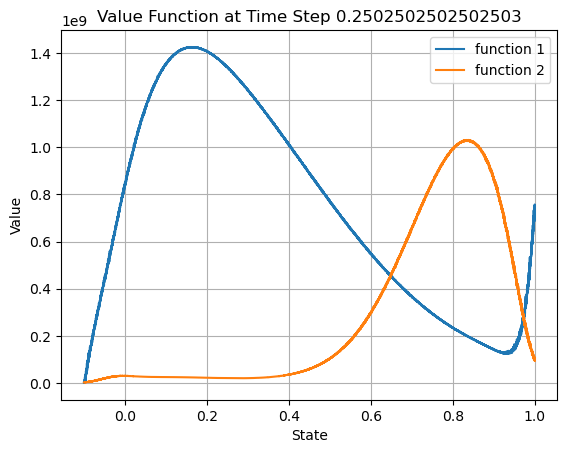

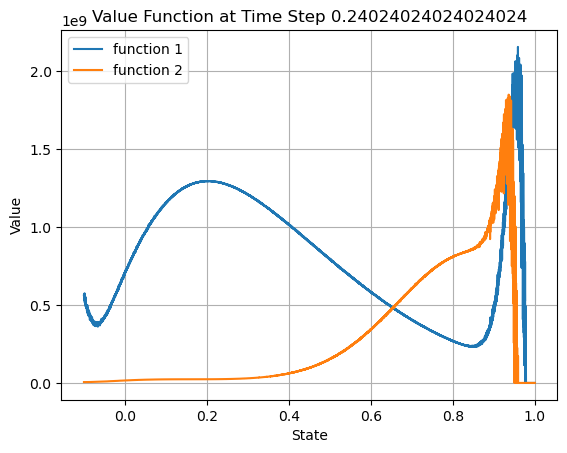

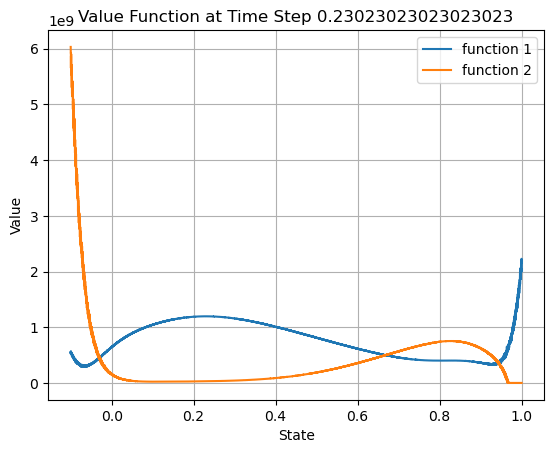

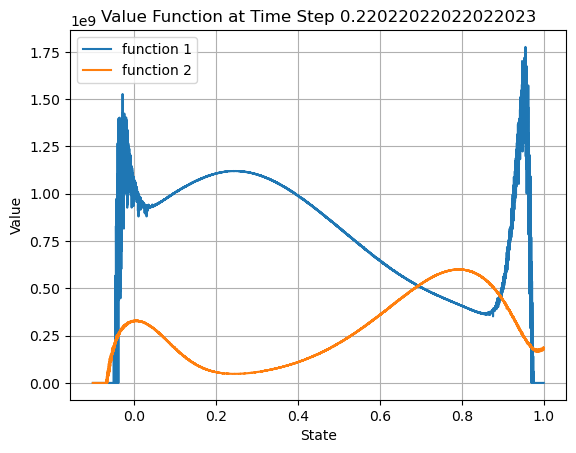

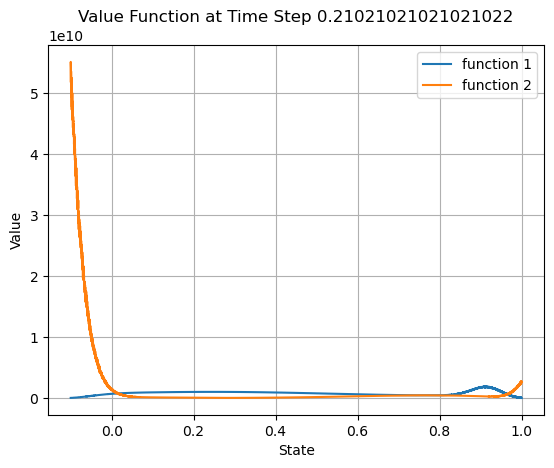

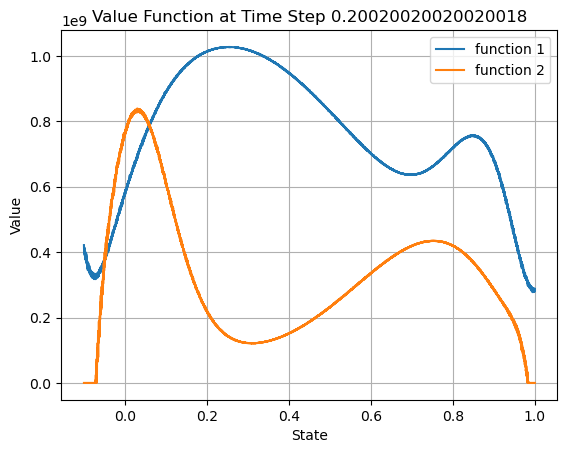

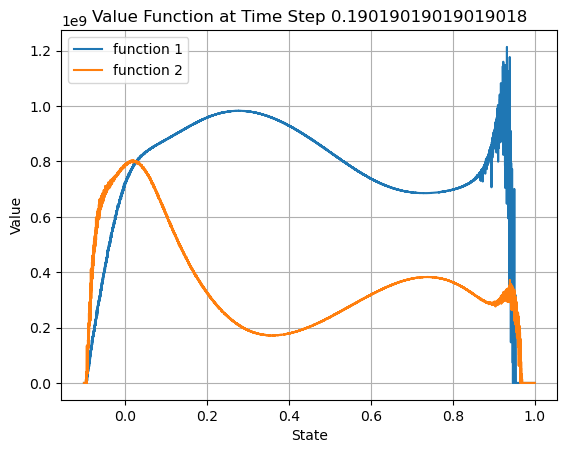

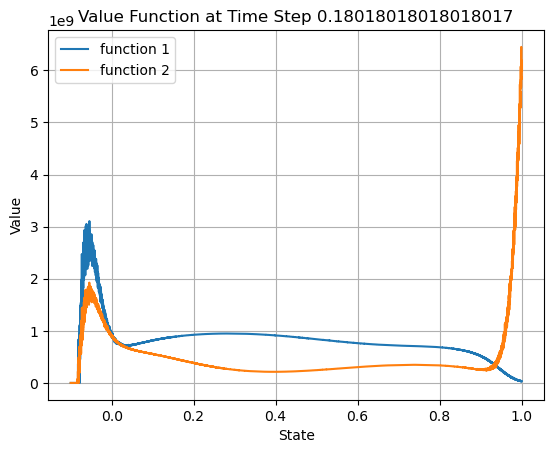

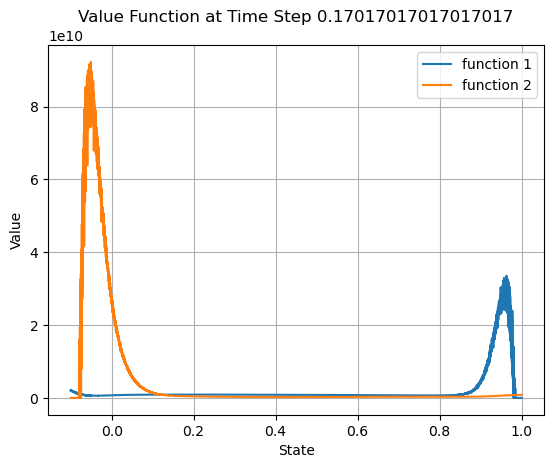

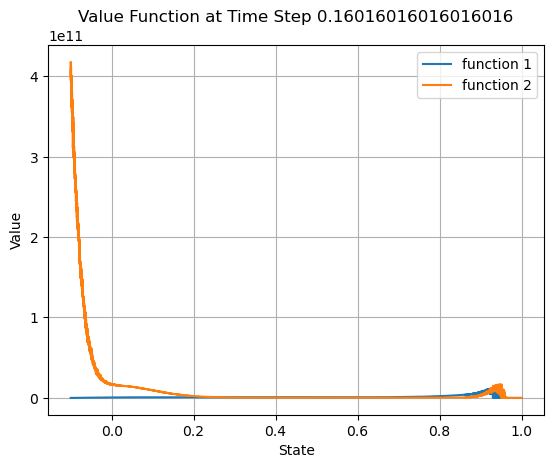

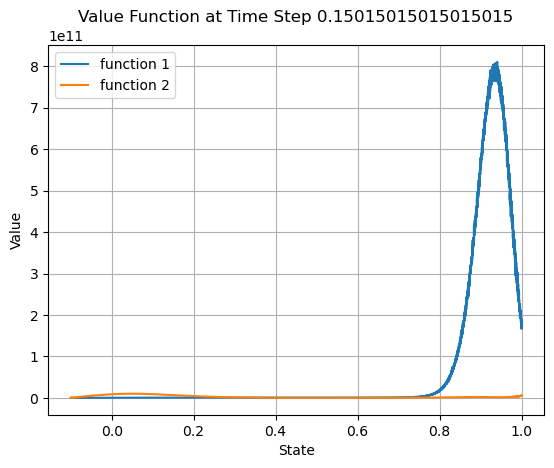

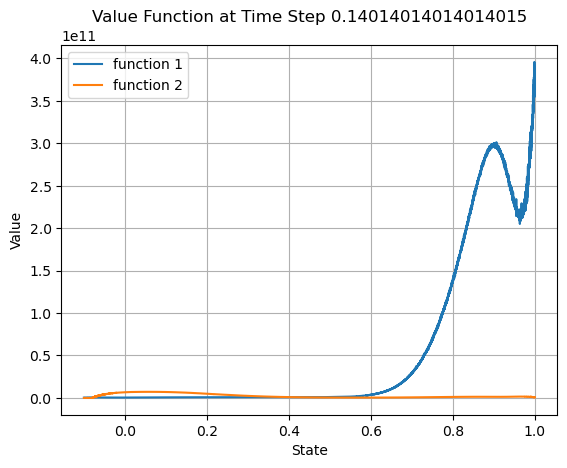

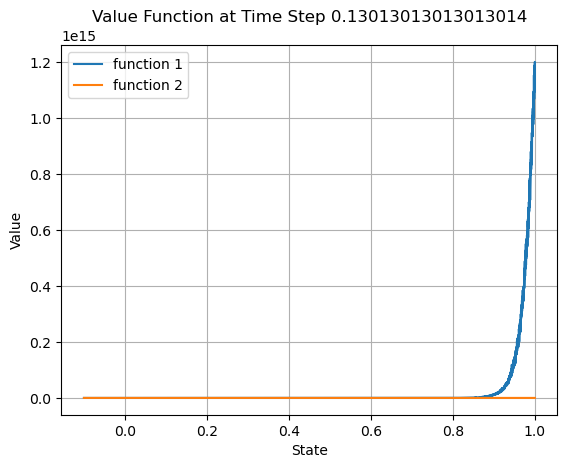

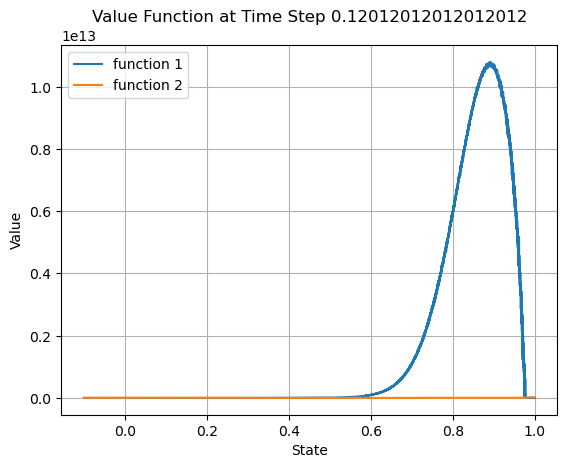

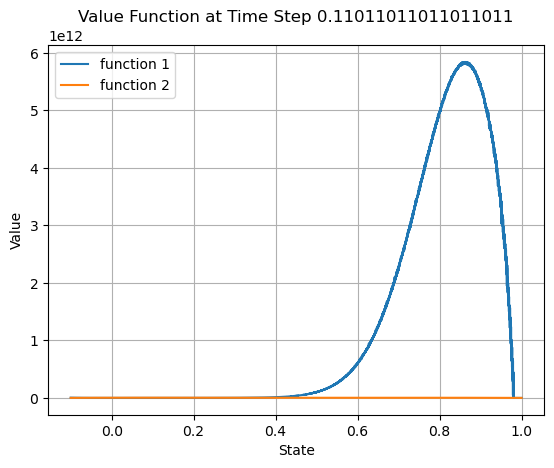

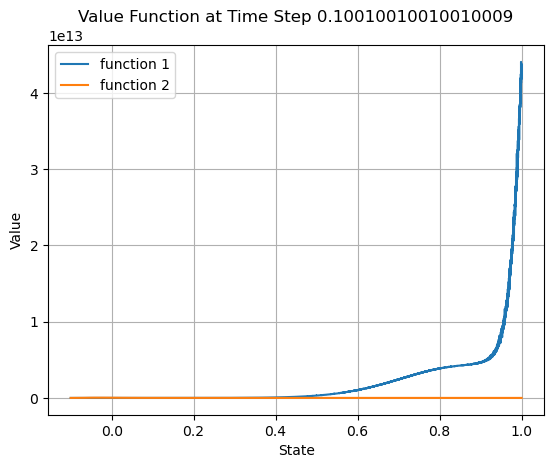

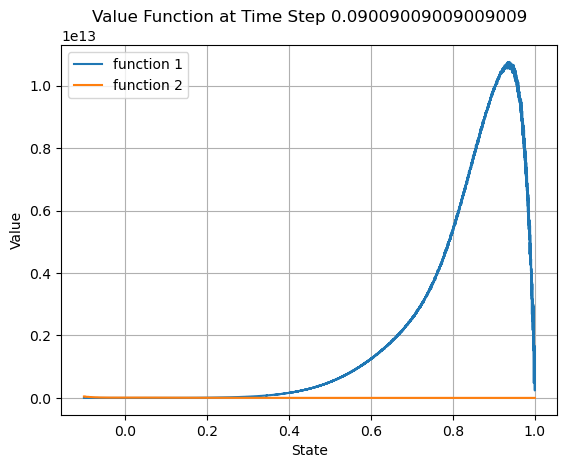

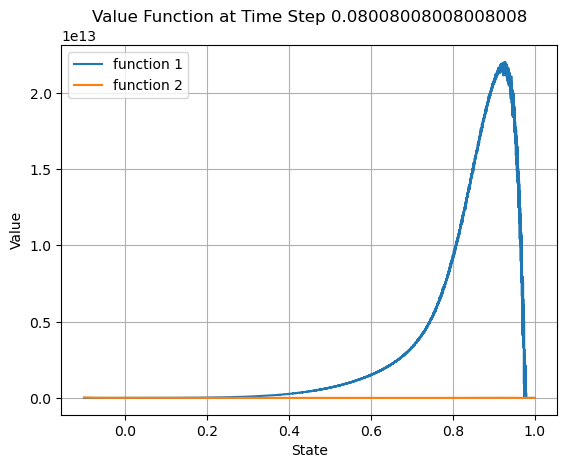

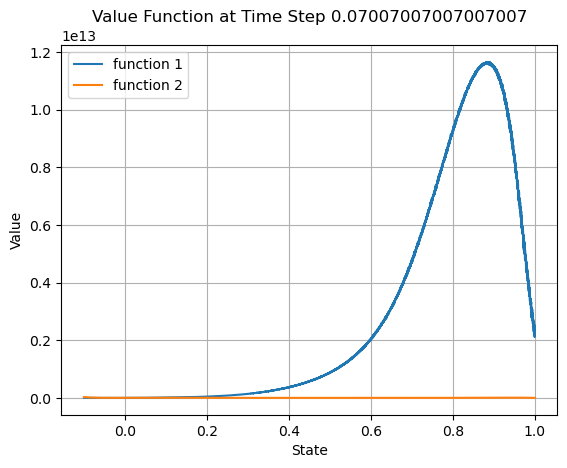

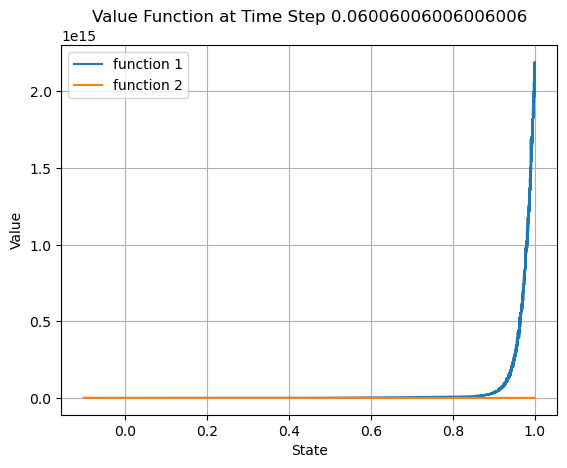

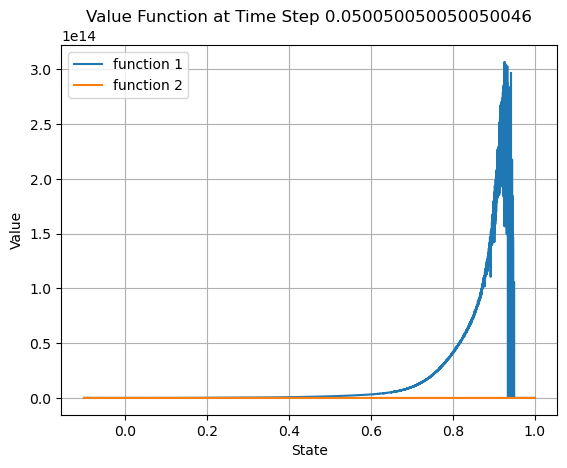

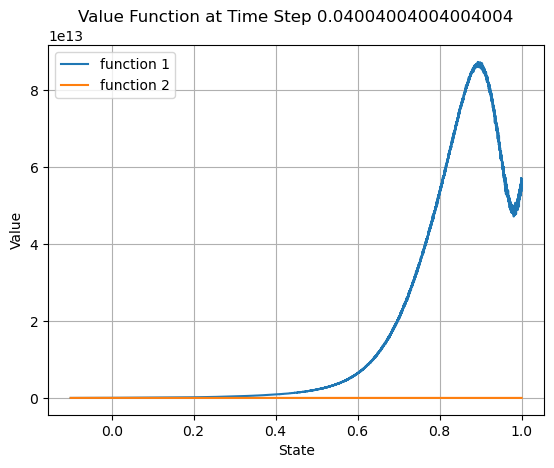

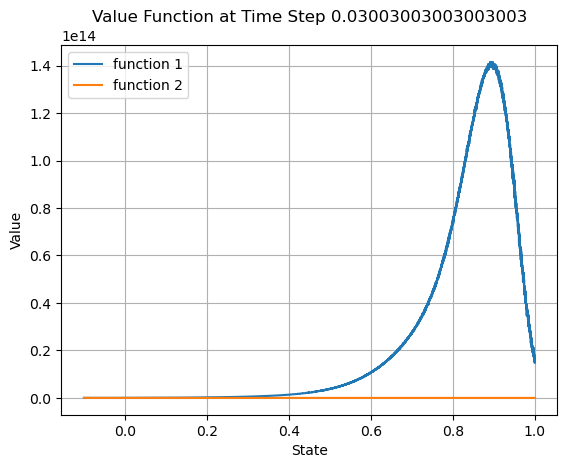

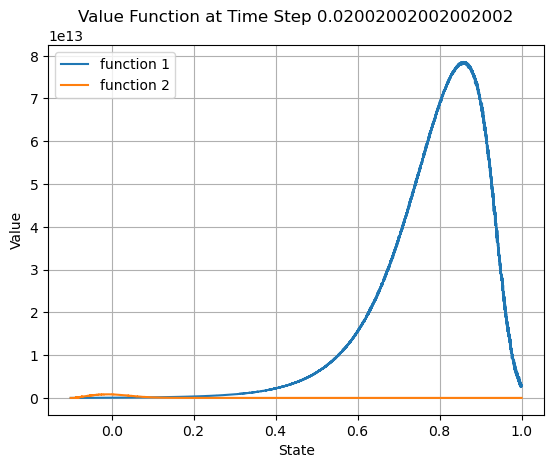

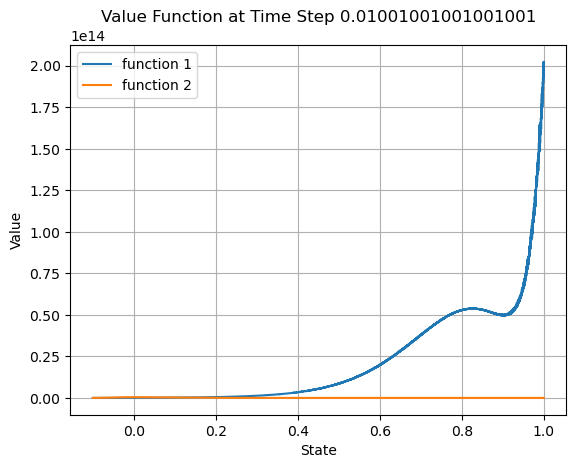

In [3]:
# t mesh
N = 1000
t_mesh = np.linspace(0, 1, N) # Temporal grid

# Exact BB
r = 0
weights = np.array([1])
parameters = np.array([[0],[1]])

# Spatial grid
a = -0.1
b = 1
L = 10000

# General initializations
M = 2000
t_mesh = np.linspace(0, 1, N) # Temporal grid
u = np.diff(t_mesh)[0] # Temporal step length
X_vals = np.linspace(a, b, L) # Spatial grid

# Obtaining value function h
from scipy.stats import rv_discrete
mu = rv_discrete(name = 'Delta Dirac', values = (0, 1))
h_function = lambda t, z: 0
dt = u.copy()
value_function_1 = np.zeros((N, L))  # Initialize the array where the boundary points are saved
value_function_1[N-1, :] = value_function_first_step(mu, X_vals, M, dt, h_function) # Value function in t = 1-dt.
# Boundary obtention
for j in range(2, N): # Loop for Z_{t + \Delta t}.
    t = 1 - (j*dt) # Time of the step.
    
    Expectance_V_next = v_expectance_1(X_vals, M, t, dt, h_function, value_function_1[N-j+1, :]) # Compute the value function expectance.
    value_function_1[N-j, :] = np.maximum(X_vals, Expectance_V_next) # Dynamic Principle

# Obtaining the value function densities
mu = "discrete"
value_function_2 = np.zeros((N, L))  # Initialize the array where the boundary points are saved
value_function_2[N-2, :] = X_vals # Value function in t = 1
for j in range(N-2, 0, -1): # Loop for Z_{t + u}.
    if j % 100 == 0:
        print(f"Temporal grid point: {j}")
    t = t_mesh[j-1] # Time of the step
    np.random.seed(123)
    Expectance_V_next = v_expectance(mu, weights, parameters, X_vals, M, t, u, value_function_2[j, :]) # Compute the value function expectance
    value_function_2[j-1, :] = np.maximum(X_vals, Expectance_V_next) # Dynamic Principle
    
for j in range(N-2, 0, -1):
    if (j % 10 == 0) or (j==N-3):  # Change frequency as needed
        plt.figure()
        plt.plot(X_vals, value_function_1[j, :], label=f"function 1")
        plt.plot(X_vals, value_function_2[j-1, :], label=f"function 2")
        plt.xlabel("State")
        plt.ylabel("Value")
        plt.title(f"Value Function at Time Step {j*u}")
        plt.legend()
        plt.grid(True)
        plt.show()
    

# Exact optimal stopping boundary for a Dirac Delta distribution

Temporal grid point: 900
Temporal grid point: 800
Temporal grid point: 700
Temporal grid point: 600
Temporal grid point: 500
Temporal grid point: 400
Temporal grid point: 300
Temporal grid point: 200
Temporal grid point: 100


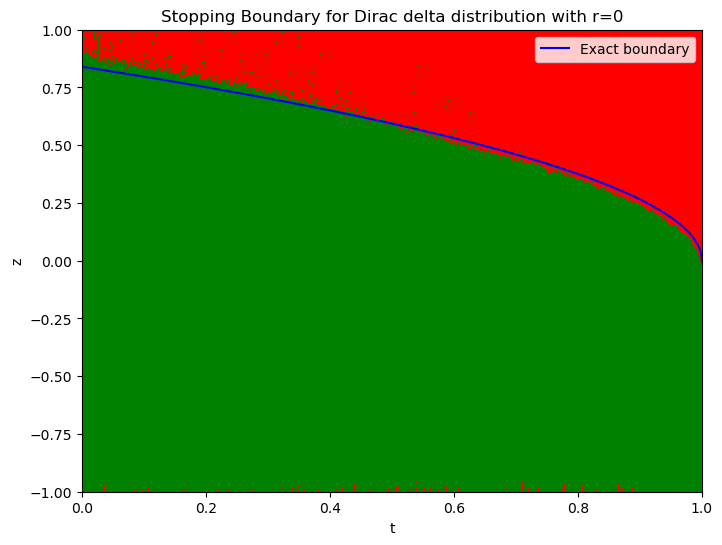

In [4]:
# Pinning point
r = 0

# t mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh)

# Boundary
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)
L = 10000
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo(mu = "discrete", weights = np.array([1]), parameters = np.array([[r],[1]]), N = mesh, a = -1, b = 1, L = L, M = 2000)
value_function_BB = value_function.copy()
# Plotting
if mesh != L:
    # Adjust meshgrid for different dimensions
    T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L))
    
    # Interpole value_function to adjust `t_mesh`
    interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
    value_function_interp = interp_func(t_mesh)
    
    # Adjust X_vals to match value_function_interp
    X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)
    comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))
    
    # Define colors
    cmap = mcolors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Stopping Boundary for Dirac delta distribution with r={r}")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

else:
    # Adjust meshgrid
    T, X = np.meshgrid(t_mesh, X_vals)
    
    # Define colors and mapping
    comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1)) # Boolean matrix
    colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
    cmap = plt.cm.colors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
    plt.pcolormesh(T, X, comparison, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Stopping Boundary for Dirac delta distribution with r={r}")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

# Theoretical optimal stopping boundary for a Normal distribution with standard deviation lower than 1

## Standard deviation of 1/2

In [ ]:
# Temporal mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh)

# Exact Brownian bridge boundary
r = 0
exact_boundary_BB = optimal_stopping_Brownian_bridge(t_mesh, r)

# Normal distribution setup
mean = r
sigma2 = (1/2)**2
L = 10000

np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo(mu="continuous", weights=np.array([1]), parameters=np.array([[mean], [sigma2]]), N=mesh, a=-1.3, b=1.3, L=L, M=3000)

exact_boundary_Normal = optimal_stopping_Normal(mesh=t_mesh, m=mean, gamma=sigma, tol=1e-6)
if mesh != L:
    # Adjust meshgrid for different dimensions
    T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L))
    
    # Interpole value_function to adjust `t_mesh`
    interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
    value_function_interp = interp_func(t_mesh)
    
    # Adjust X_vals to match value_function_interp
    X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)
    comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))
    
    # Define colors
    cmap = mcolors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary_BB, 'y-', label="Exact boundary for Brownian bridge")
    plt.plot(t_mesh, exact_boundary_Normal, 'b-', label="Exact boundary for Normal")
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal distribution (σ^2 = {sigma2})")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

else:
    # Adjust meshgrid
    T, X = np.meshgrid(t_mesh, X_vals)
    
    # Define colors and mapping
    comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1)) # Boolean matrix
    colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
    cmap = plt.cm.colors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary_BB, 'y-', label="Exact boundary for Brownian bridge")
    plt.plot(t_mesh, exact_boundary_Normal, 'b-', label="Exact boundary for Normal")
    plt.pcolormesh(T, X, comparison, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal distribution (σ^2 = {sigma2})")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

Temporal grid point: 900


## Debugging

In [41]:
# Temporal mesh
mesh = 2000
t_mesh = np.linspace(0, 1, mesh)

# Normal distribution setup
mean = 0
sigma2 = (1/2)**2
L = 10
mu = "continuous"
weights=np.array([1])
parameters=np.array([[mean, 10], [sigma2, 1/100]])
N=mesh
a=-1.3
b=1.3
L=L
M=10
alpha = 1.5

# General initializations
t_mesh = np.linspace(0, 1, N) # Temporal grid
u = np.diff(t_mesh)[0] # Temporal step length
X_vals = np.linspace(a, b, L) # Spatial grid
value_function = np.zeros((N, L))  # Initialize the array where the boundary points are saved
value_function[N-2, :] = X_vals # Value function in t = 1

# Obtaining the boundary
j = 1998
t = t_mesh[j-1] # Time of the step
M_t = int(M * (1 + alpha * (1 - t)))

# Create an interpolator function
interp_func = interp1d(X_vals, value_function[N-2, :], kind='linear', fill_value="extrapolate")
  
# Initialize E[V(t+s, Z_{t+s}) | Z_t = X_vals]
v_expec = np.zeros(len(X_vals))

for y in X_vals:
    # Generate random points where the process may end
    # Initialize variables
    m = parameters[0]
    gamma2 = parameters[1]
    
    # Update parameters and weights to t,z
    A = t/(2*(1 - t)) + 1/(2*gamma2)
    print(A)
    B = (y/(1-t)) + m/gamma2
    print(B)
    C = B**2/(4*A) - m**2/(2*gamma2)
    print(C)
    
    m_tz = B/(2*A)
    gamma_tz = np.sqrt(1/(2*A))
    print(np.isinf(np.exp(C)).any())
    if np.isinf(np.exp(C)).any():
        weights_tz = (np.exp(C) == np.inf).astype(int)
    else:
        weights_tz_numerator = weights * np.exp(C) * np.sqrt(np.pi/A)
        weights_tz = weights_tz_numerator/np.sum(weights_tz_numerator)
    
    # Sample distributions
    print(weights_tz)
    selection = np.random.choice(list(range(0,parameters.shape[1])), size = M, p = weights_tz)
    print(selection)
    
    # Samples of \mu_{t,z}
    mu_ty_points = np.random.normal(loc=m_tz[selection], scale=gamma_tz[selection])
    
    # Simulate a brownian bridge that ends in the mu_tz_points. Keep only the value on t+u
    Z_tu = simulate_brownian_bridge(t, z_t = x_val, T = 1, z_T = mu_ty_points, u = u)
    
    # Obtaining the value function for the obtained points
    v_new = interp_func(Z_tu)


[501.25 549.25]
[-1299.35  -299.35]
[  842.05008603 -4959.21237028]
True
[1 0]
[0 0 0 0 0 0 0 0 0 0]
[501.25 549.25]
[-1010.60555556   -10.60555556]
[  509.38832365 -4999.94880391]
False
[1. 0.]
[0 0 0 0 0 0 0 0 0 0]
[501.25 549.25]
[-721.86111111  278.13888889]
[  259.89200186 -4964.78778265]
False
[1. 0.]
[0 0 0 0 0 0 0 0 0 0]
[501.25 549.25]
[-433.11666667  566.88333333]
[   93.56112067 -4853.7293065 ]
False
[1. 0.]
[0 0 0 0 0 0 0 0 0 0]
[501.25 549.25]
[-144.37222222  855.62777778]
[   10.39568007 -4666.77337546]
False
[1. 0.]
[0 0 0 0 0 0 0 0 0 0]
[501.25 549.25]
[ 144.37222222 1144.37222222]
[   10.39568007 -4403.91998953]
False
[1. 0.]
[0 0 0 0 0 0 0 0 0 0]
[501.25 549.25]
[ 433.11666667 1433.11666667]
[   93.56112067 -4065.16914871]
False
[1. 0.]
[0 0 0 0 0 0 0 0 0 0]
[501.25 549.25]
[ 721.86111111 1721.86111111]
[  259.89200186 -3650.520853  ]
False
[1. 0.]
[0 0 0 0 0 0 0 0 0 0]
[501.25 549.25]
[1010.60555556 2010.60555556]
[  509.38832365 -3159.9751024 ]
False
[1. 0.]
[0 0 0 

C:\Users\User\AppData\Local\Temp\ipykernel_1190808\1448259861.py:53: RuntimeWarning: overflow encountered in exp
  print(np.isinf(np.exp(C)).any())
C:\Users\User\AppData\Local\Temp\ipykernel_1190808\1448259861.py:54: RuntimeWarning: overflow encountered in exp
  if np.isinf(np.exp(C)).any():
C:\Users\User\AppData\Local\Temp\ipykernel_1190808\1448259861.py:55: RuntimeWarning: overflow encountered in exp
  weights_tz = (np.exp(C) == np.inf).astype(int)


# Mixture

In [14]:
# t mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh) # Temporal grid

# Spatial grid
L = 10000

np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo(mu = "continuous", weights = np.array([1/2, 1/2]), parameters = np.array([[-1/2, 1/2],[1/2, 1/2]]), N = mesh, a = -1, b = 1, L = L, M = 2000)

value_function_Mixture = value_function.copy()

if mesh != L:
    # Adjust meshgrid for different dimensions
    T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L))
    
    # Interpole value_function to adjust `t_mesh`
    interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
    value_function_interp = interp_func(t_mesh)
    
    # Adjust X_vals to match value_function_interp
    X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)
    comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))
    
    # Define colors
    cmap = mcolors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal mixture")
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

else:
    # Adjust meshgrid
    T, X = np.meshgrid(t_mesh, X_vals)
    
    # Define colors and mapping
    comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1)) # Boolean matrix
    colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
    cmap = plt.cm.colors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal mixture")
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

KeyboardInterrupt: 